In [1]:
cd

D:\Box Sync\Policy Evaluation\dofiles


In [19]:
cd "..\working_data\analytical_panel_shapefile\"
// Convert shapefile to dta
spshape2dta "analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan", replace
// Already ran this

  (importing .shp file)
  (importing .dbf file)
  (creating _ID spatial-unit id)
  (creating _CX coordinate)
  (creating _CY coordinate)

  file analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan_shp.dta created
  file analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta     created


In [3]:
clear

In [31]:
use "analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan",clear

In [32]:
codebook _CY _CX


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_CY                                                                                                                                                                                                                               y-coordinate of area centroid
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (double)

                 range:  [40.700958,40.876938]        units:  1.000e-09
         unique values:  2,736                    missing .:  0/2,736

                  mean:   40.7718
          

In [33]:
gen test =  _CY == y_left
tab test
gen test2 = _CX == x_left
tab test2




       test |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,736      100.00      100.00
------------+-----------------------------------
      Total |      2,736      100.00



      test2 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,736      100.00      100.00
------------+-----------------------------------
      Total |      2,736      100.00


In [34]:
drop test test2

In [35]:

gen quarterly = yq(year_left, quarter_le)
format quarterly %tq


In [36]:
tab quarterly, nolabel


  quarterly |      Freq.     Percent        Cum.
------------+-----------------------------------
     2012q3 |      2,736      100.00      100.00
------------+-----------------------------------
      Total |      2,736      100.00


In [37]:
// Left this in here in case I use the full panel shapefile
keep if quarterly == tq(2012q3)

(0 observations deleted)


In [38]:
codebook _ID


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_ID                                                                                                                                                                                                                                             Spatial-unit ID
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [1,2736]                     units:  1
         unique values:  2,736                    missing .:  0/2,736

                  mean:    1368.5
              std. de

In [41]:
duplicates tag _ID _CY _CX, gen(dup)
tab dup
drop dup




Duplicates in terms of _ID _CY _CX


        dup |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,736      100.00      100.00
------------+-----------------------------------
      Total |      2,736      100.00



In [42]:
describe, fullname


Contains data from analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
  obs:         2,736                          
 vars:            34                          11 Feb 2019 13:23
 size:       202,464                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_ID             int     %12.0g                Spatial-unit ID
_CX             double  %10.0g                x-coordinate of area 

In [43]:
spset
spset, coordsys(latlong, miles) modify 


  Sp dataset analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
                data:  cross sectional
     spatial-unit id:  _ID
         coordinates:  _CX, _CY (planar)
    linked shapefile:  analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan_shp.dta

  Sp dataset analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
                data:  cross sectional
     spatial-unit id:  _ID
         coordinates:  _CY, _CX (latitude-and-longitude, miles)
    linked shapefile:  analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan_shp.dta



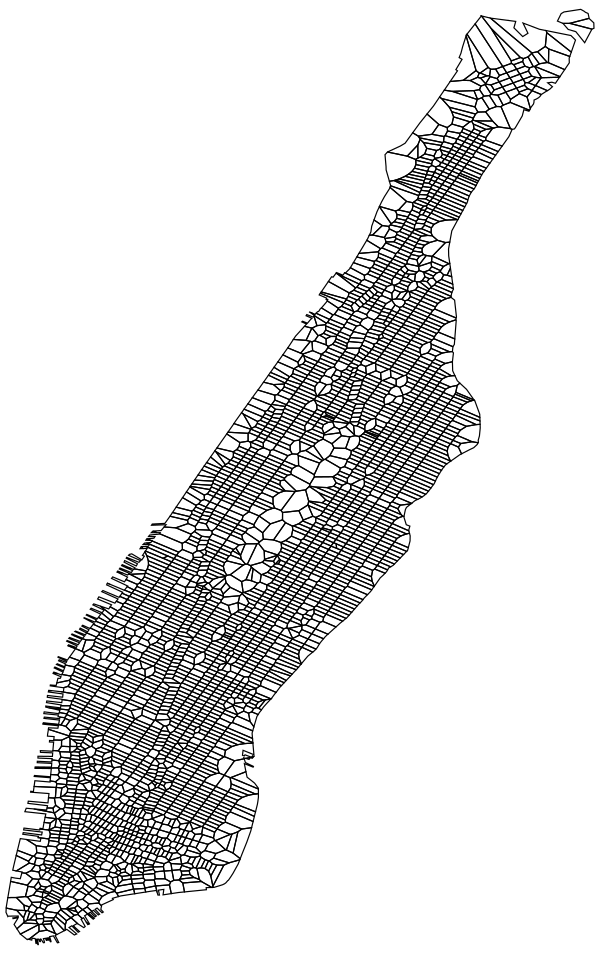

In [44]:
grmap

### Calculate Contiguity and Inverse Distance matrix

In [45]:
// Create Matrix W

spmatrix create contiguity W
cd "..\"
cd "..\working_data\"
spmatrix save W using "contiguity_W.stswm"




D:\Box Sync\Policy Evaluation\working_data

D:\Box Sync\Policy Evaluation\working_data

  (matrix W saved in file contiguity_W.stswm)


In [46]:
spmatrix summarize W


Weighting matrix  W
---------------------------------------
           Type |           contiguity
  Normalization |             spectral
      Dimension |          2736 x 2736
Elements        |
   minimum      |                    0
   minimum > 0  |             .1600261
   mean         |             .0003389
   max          |             .1600261
Neighbors       |
   minimum      |                    2
   mean         |              5.79386
   maximum      |                   12
---------------------------------------


In [ ]:
/*
spmatrix export W using "contiguity_W"
clear
import delimited using "contiguity_W.txt" , delimiters(" ")
drop if mi(v2)
save "contiguity_W.dta"
*/

In [ ]:
// Create Matrix M
/*
cd "..\working_data\analytical_panel_shapefile\"
spmatrix create idistance M if quarter==3 & year == 2012
cd "..\"
cd "..\working_data\"
spmatrix save M using "idistance_M.stswm"
*/

### Use saved matrix

In [47]:
cd "..\"
cd "..\working_data\"
spmatrix use W using "contiguity_W.stswm"
*spmatrix use M using "idistance_M.stswm"


D:\Box Sync\Policy Evaluation

unable to change to ..\working_data\


r(170);
r(170);


In [52]:
cd "D:\Box Sync\Policy Evaluation\dofiles"

D:\Box Sync\Policy Evaluation\dofiles


In [48]:
spmatrix dir


------------------------------------------------------------------------
   Weighting matrix name           N x N      Type         Normalization
------------------------------------------------------------------------
                       W     2736 x 2736    contiguity       spectral
------------------------------------------------------------------------


In [49]:
keep _ID _CX _CY intersecti

In [53]:
mmerge intersecti using "..\working_data\analytical_file_panel_qt.dta", ///
type(1:n) ///
unmatched(master) ///
umatch(intersection_id)



-------------------------------------------------------------------------------
merge specs          |
       matching type | 1:n
  mv's on match vars | none
  unmatched obs from | master
---------------------+---------------------------------------------------------
  master        file | analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
                 obs |   2736
                vars |      4
          match vars | intersecti  (key)
  -------------------+---------------------------------------------------------
  using         file | ..\working_data\analytical_file_panel_qt.dta
                 obs | 324675
                vars |    157
          match vars | intersection_id  (not a key)
---------------------+---------------------------------------------------------
variable intersecti does not uniquely identify observations in C:\Users\szej01\AppData\Local\Temp\ST_3a9c_000002.tmp
result          file | analytical_panel_qt_shapefile_crosssec_thiessen

In [54]:
describe


Contains data from analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
  obs:        68,400                          
 vars:           161                          11 Feb 2019 13:23
 size:    44,528,400                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_ID             int     %12.0g                Spatial-unit ID
_CX             double  %10.0g                x-coordinate of area 

personsinjured  byte    %10.0g                No. of persons injured during that month
personskilled   byte    %10.0g                No. of persons killed during that month
pedestriansin~d byte    %10.0g                No. of pedestrians injured during that month
pedestrianski~d byte    %10.0g                No. of pedestrians killed during that month
cyclistinjured  byte    %10.0g                No. of cyclist injured during that month
cyclistkilled   byte    %10.0g                No. of cyclist killed during that month
motoristinjured byte    %10.0g                No. of motorist injured during that month
motoristkilled  byte    %10.0g                No. of motorist killed during that month
late~onsinjured byte    %9.0g                 No. of persons injured during that month between 11pm - 5am
laten~onskilled byte    %9.0g                 No. of persons killed during that month between 11pm - 5am
late~ansinjured byte    %9.0g                 No. of pedestrians injured during that mo

In [55]:
sort _ID  quarterly 

In [56]:
xtset _ID quarterly, quarterly

       panel variable:  _ID (strongly balanced)
        time variable:  quarterly, 2012q3 to 2018q3
                delta:  1 quarter


In [57]:
cd "..\manuscripts"

D:\Box Sync\Policy Evaluation\manuscripts


In [58]:
global time_var i.quarterly
global time_variant_var bike_route_tv flag_street_improv flag_left_turn
global time_trend i.flag_school##i.quarterly i.flag_priorityinters##i.quarterly i.flag_seniors##i.quarterly

## Spatial Lag Model

In [59]:
global outcome1 collision_count
global outcome2 latenight_$outcome1
global outcome3 day_$outcome1
global filename sp_qt_results_xt_$outcome1

In [60]:
// Spatial Lag Model
spxtregress $outcome1 i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W)

  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -133972.25  
Iteration 1:   log likelihood = -133970.39  
Iteration 2:   log likelihood = -133970.39  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -133970.39  
Iteration 1:   log likelihood = -133970.39  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(101)    =    7445.38
                                                Prob > chi2       =     0.0000
Log likelihood = -1.340e+05                     Pseudo R2         =     0.0036

--------------------------------

                       1 228  |   -3.82152   .3951202    -9.67   0.000    -4.595941   -3.047099
                       1 229  |  -3.781369   .3950642    -9.57   0.000    -4.555681   -3.007057
                       1 230  |  -3.995494   .3953501   -10.11   0.000    -4.770366   -3.220621
                       1 231  |  -4.256165   .3954148   -10.76   0.000    -5.031164   -3.481167
                       1 232  |  -3.666383   .3954135    -9.27   0.000     -4.44138   -2.891387
                       1 233  |  -3.586055   .3953749    -9.07   0.000    -4.360975   -2.811135
                       1 234  |  -3.871123   .3953709    -9.79   0.000    -4.646035    -3.09621
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .2086088   .1115945     1.87   0.062    -.0101125    .4273301
                       1 212  |    .006489   .1115835     0.06   0.954    -.212210

In [61]:
estat impact flag_LPIS


progress   : 50% 100% 

Average impacts                                 Number of obs     =     68,400

------------------------------------------------------------------------------
             |            Delta-Method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
direct       |
   flag_LPIS |
          1  |  -.1063638   .0378835    -2.81   0.005    -.1806141   -.0321134
-------------+----------------------------------------------------------------
indirect     |
   flag_LPIS |
          1  |  -.0219132   .0078668    -2.79   0.005    -.0373318   -.0064946
-------------+----------------------------------------------------------------
total        |
   flag_LPIS |
          1  |   -.128277   .0457104    -2.81   0.005    -.2178678   -.0386861
------------------------------------------------------------------------------


In [ ]:
// Late night
spxtregress $outcome2 i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W)

  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -55272.449  
Iteration 1:   log likelihood = -55256.143  
Iteration 2:   log likelihood = -55256.143  


In [ ]:
estat impact flag_LPIS

In [ ]:
// Day time
spxtregress $outcome3 i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W)

In [ ]:
estat impact flag_LPIS

## Spatial Error Model

In [ ]:
// Spatial Error Model
spxtregress $outcome1 flag_LPIS $time_variant_var $time_var $time_trend, fe errorlag(W)

In [ ]:
estat impact flag_LPIS

In [ ]:
// Latenight
spxtregress $outcome2 flag_LPIS $time_variant_var $time_var $time_trend, fe errorlag(W)

In [ ]:
estat impact flag_LPIS

In [ ]:
// Day time
spxtregress $outcome3 flag_LPIS $time_variant_var $time_var $time_trend, fe errorlag(W)

In [ ]:
estat impact flag_LPIS

## Spatial Lag and Error Model

In [ ]:
spxtregress collision_count i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W) errorlag(W)

In [ ]:
estat impact